1. Провести парсинг самостійно обраного сайту. Вміст даних, що підлягають парсингу – обрати самостійно.  
2. Результати парсингу зберегти у файлі. Тип файлу обрати самостійно. 
3. Оцінити динаміку тренду реальних даних. 
4. Здійснити визначення статистичних характеристик результатів парсингу.  
5. Синтезувати та веріфікувати модель даних, аналогічних за трендом і статистичними характеристиками реальним даним, які є результатом парсингу. 
6. Провести аналіз отриманих результатів.

In [60]:
import time
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from scipy.interpolate import interp1d
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import t

np.random.seed(42)  # Set the random seed to a specific value for reproducibility

In [61]:
def parse_url_BTC():
    time_span_month=12
    file_name = 'Лошак_Віктор_ІП-11_1.ipynb'
    notebook_path = os.path.abspath(file_name)
    current_dir = os.path.dirname(notebook_path)
    download_dir = current_dir
    
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    chrome_options.add_experimental_option("prefs", {
    "download.default_directory": download_dir,
    "download.prompt_for_download": False,
    "download.directory_upgrade": True})
    # prefs = {"download.default_directory" : }
    # chrome_options.add_experimental_option("prefs",prefs)
    driver = webdriver.Chrome(options=chrome_options)
    
    url = "https://coinmarketcap.com/currencies/bitcoin/historical-data/"
    cookie_selector = "#onetrust-reject-all-handler"
    select_date_selector = '#__next > div.sc-faa5ca00-1.cKgcaj.global-layout-v2 > div.main-content > div.cmc-body-wrapper > div > div > div > div.sc-a63f8491-0.iqxzkl > div > div.sc-f12c0da8-0.pHaAM > div > button:nth-child(2)'
    beginning_month_selector='#tippy-2 > div > div.tippy-content > div > div > div.sc-b36483b8-3.mgXba > div.sc-da29966c-0.gYoufT > div > div > div.react-datepicker__month-container > div.react-datepicker__header.react-datepicker__header--custom > div.sc-b36483b8-1.hUsaJQ > span.icon-Chevron-left'
    end_month_selector = '#tippy-2 > div > div.tippy-content > div > div > div.sc-b36483b8-3.mgXba > div.sc-da29966c-0.gYoufT > div > div > div.react-datepicker__month-container > div.react-datepicker__header.react-datepicker__header--custom > div.sc-b36483b8-1.hUsaJQ > span.icon-Chevron-right'
    beginning_date_selector = '#tippy-2 > div > div.tippy-content > div > div > div.sc-b36483b8-3.mgXba > div.sc-da29966c-0.gYoufT > div > div > div.react-datepicker__month-container > div.react-datepicker__month > div:nth-child(3) > div.react-datepicker__day.react-datepicker__day--013'
    end_day_selector = '#tippy-2 > div > div.tippy-content > div > div > div.sc-b36483b8-3.mgXba > div.sc-da29966c-0.gYoufT > div > div > div.react-datepicker__month-container > div.react-datepicker__month > div:nth-child(2) > div.react-datepicker__day.react-datepicker__day--013.react-datepicker__day--keyboard-selected'
    continue_selector = '#tippy-2 > div > div.tippy-content > div > div > div.sc-b36483b8-2.cUPlMD > span > button'
    download_selector = '#__next > div.sc-faa5ca00-1.cKgcaj.global-layout-v2 > div.main-content > div.cmc-body-wrapper > div > div > div > div.sc-a63f8491-0.iqxzkl > div > div.sc-f12c0da8-0.pHaAM > div > button:nth-child(3)'
    driver.get(url)
    
    #scroll for cookies to show up
    driver.execute_script("window.scrollBy(0, 1);")
    button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, cookie_selector)))
    button.click() 
    button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, select_date_selector)))
    button.click()
    for i in range(time_span_month):
        button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, beginning_month_selector)))
        button.click()
    button = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, beginning_date_selector)))
    button.click()
    for i in range(time_span_month):
        button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, end_month_selector)))
        button.click()
    button = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, end_day_selector)))
    button.click()
    button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, continue_selector)))
    button.click()
    time.sleep(4)
    button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, download_selector)))
    button.click()
    time.sleep(10)
    driver.quit()  

In [62]:
parse_url_BTC()

In [63]:
file_path = glob.glob('Bitcoin*.csv')[0]
bitcoin_df = pd.read_csv(file_path, sep=';')

# Continue with the rest of the code
bitcoin_df['timeOpen'] = pd.to_datetime(bitcoin_df['timeOpen']).dt.date
bitcoin_df = bitcoin_df[['timeOpen','open']]
bitcoin_df.set_index("timeOpen", inplace=True)
bitcoin_df = bitcoin_df.sort_values('timeOpen')
print(bitcoin_df)

                    open
timeOpen                
2022-10-14  19382.533972
2022-10-15  19185.437304
2022-10-16  19068.913560
2022-10-17  19268.562102
2022-10-18  19550.466743
...                  ...
2023-10-09  27934.472162
2023-10-10  27589.201102
2023-10-11  27392.075546
2023-10-12  26873.292491
2023-10-13  26752.879558

[365 rows x 1 columns]


<Axes: xlabel='timeOpen'>

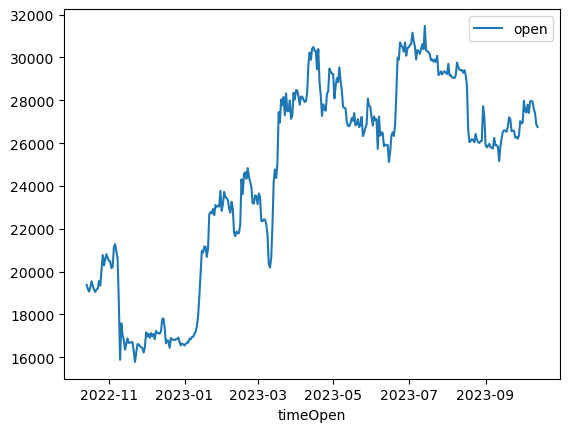

In [64]:
bitcoin_df.plot()

In [65]:
bitcoin_df.describe()

,open
count,365.000000
mean,24529.054153
std,4615.469668
min,15782.301231
25%,20686.745906
50%,26163.680054
75%,28075.592141
max,31474.721364


In [66]:
bitcoin_df.var()

open    2.130256e+07
dtype: float64

Loess function accepts *y*(the dependent variable), then *x*(the independent variable-- in our case it is time, but the x has to be numeric, because it is used in calculations and the distance between the two numbers is easier to define) and the *frac*(the amount of points taken into account when building local regression model). To make our model have more variance we can use validation dataset to find the appropriate frac parameted which does not overfit. 

In [67]:
train_df, val_df = train_test_split(bitcoin_df, test_size=0.2, random_state=42)
train_df = train_df.sort_values('timeOpen')
val_df = val_df.sort_values('timeOpen')

Let's visualize validation dataset. The plot function apparantly uses linear interpolation to fill in the values for indices which are not present in the validation dataset. 

<Axes: title={'center': 'Train Set'}, xlabel='timeOpen'>

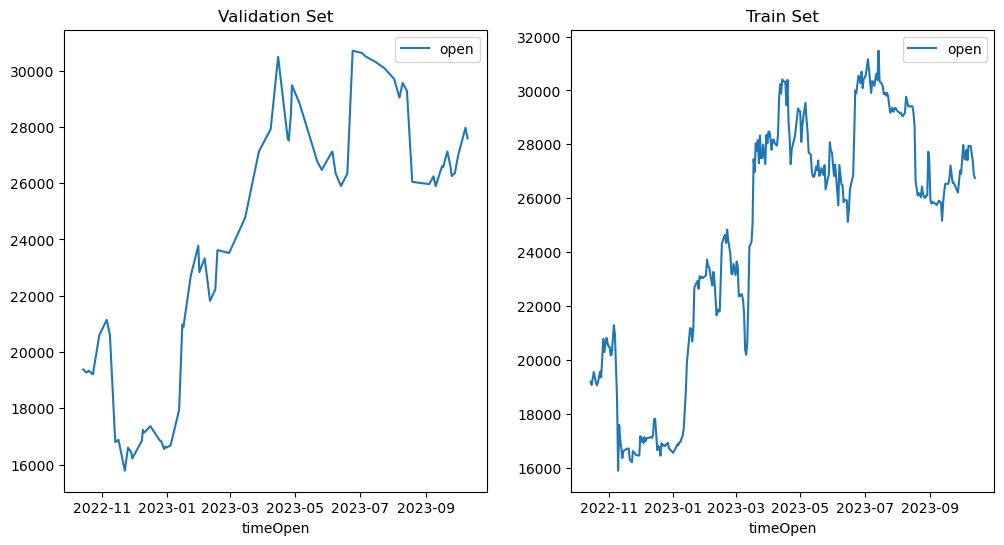

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
val_df.sort_values('timeOpen').plot(ax = axes[0], title = 'Validation Set')
train_df.plot( ax = axes[1], title = 'Train Set')

Unfortunately we can not access the information from the plot so we would have to do linear interpolation based on the available data ourselves.  Actually I should have used **scipy.interpolation** module for that but now it is too late.

In [69]:
val_df_aligned = val_df.copy()
for ind in train_df.index:
    val_df_aligned.loc[ind, 'open'] = None

val_df_aligned = val_df_aligned.sort_values('timeOpen')
val_df_interpolated = val_df_aligned.interpolate(method = 'linear')

print(val_df_interpolated)

                    open
timeOpen                
2022-10-14  19382.533972
2022-10-15  19344.543349
2022-10-16  19306.552726
2022-10-17  19268.562102
2022-10-18  19301.794272
...                  ...
2023-10-09  27780.439604
2023-10-10  27589.201102
2023-10-11  27589.201102
2023-10-12  27589.201102
2023-10-13  27589.201102

[365 rows x 1 columns]


Now we use graph to find the frac value which has optimal balance between overfitting and underfitting to our data. 

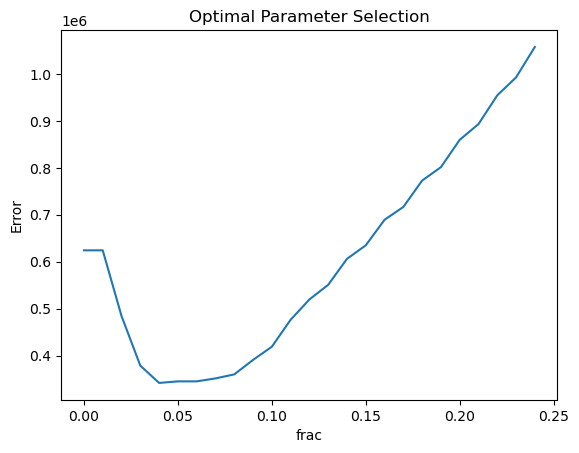

Optimal frac value: 0.04


In [70]:

def mse(frac):
    smoothed = sm.nonparametric.lowess(train_df['open'], range(len(train_df)), frac=frac)
    return np.mean((smoothed[:, 1] - val_df_interpolated.loc[train_df.index]['open'])**2)

param_grid = {'frac': np.arange(0, 0.25, 0.01)}
frac_values = param_grid['frac']
error_values = [mse(frac) for frac in frac_values]

plt.plot(frac_values, error_values)
plt.xlabel('frac')
plt.ylabel('Error')
plt.title('Optimal Parameter Selection')
plt.show()

min_error = min(error_values)
optimal_frac = frac_values[error_values.index(min_error)]
print("Optimal frac value:", optimal_frac)


Let's plot the smoothed out version of the graph side by side with the original.

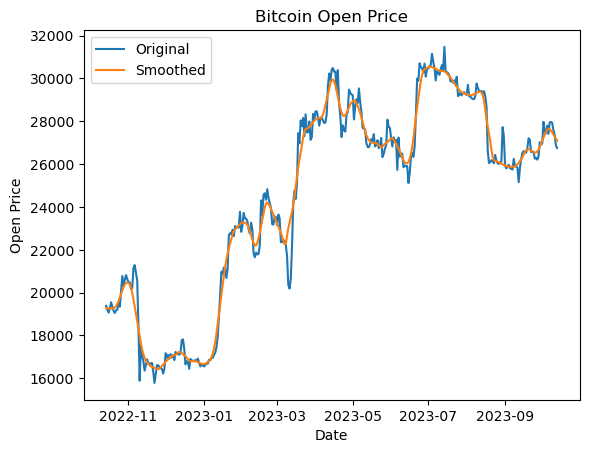

In [71]:
trend_model = sm.nonparametric.lowess(bitcoin_df['open'], range(len(bitcoin_df)), frac=optimal_frac)
plt.plot(bitcoin_df.index, bitcoin_df['open'], label='Original')
plt.plot(bitcoin_df.index, trend_model[:, 1], label='Smoothed')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Bitcoin Open Price')
plt.legend()
plt.show()

I have just figured out that you can use scipy **inerp1d** to essentially achieve what we have done by hand earlier -- interpolate the function defined with discrete points on some interval. As it is visible from the visualization the cubic interpolation function will do. 

<Axes: title={'center': 'Model trend'}, xlabel='timeOpen'>

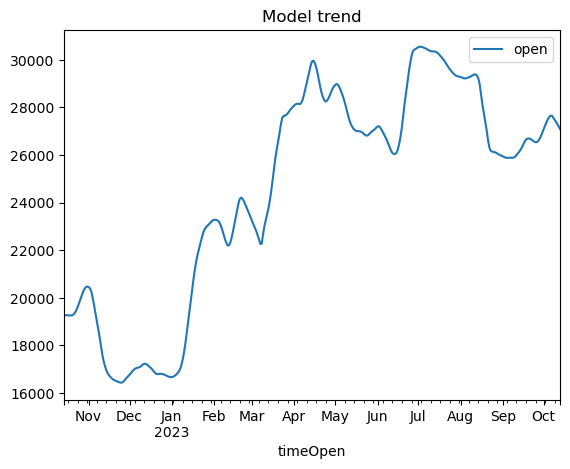

In [72]:
trend_model_func = interp1d(range(len(bitcoin_df)), trend_model[:, 1], kind='cubic')
check_df = pd.DataFrame({'timeOpen': pd.to_datetime(bitcoin_df.index), 'open': trend_model_func(range(len(bitcoin_df)))})
check_df.plot(x='timeOpen', y='open' , title='Model trend')

Let's extract residuals from bitcoin data using our extracted trend. By doing so we will receive a stationary time series which represents the residuals. This data can then be used to spot anomalies in the original time series and also to model the noice which should be added to our model. 

<Axes: title={'center': 'Data Residuals'}, xlabel='timeOpen'>

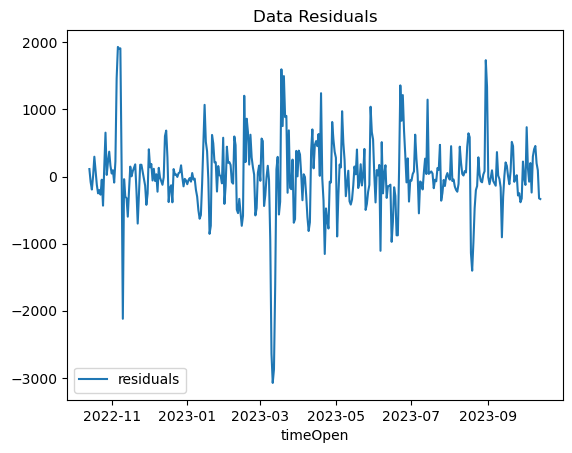

In [73]:
residuals_df = bitcoin_df.copy()
residuals_df.rename(columns={'open': 'residuals'}, inplace=True)
residuals_df['residuals'] = residuals_df['residuals'] - trend_model[:, 1]
residuals_df.plot(title='Data Residuals')

Let's find out how the residuals are distributed around mean.

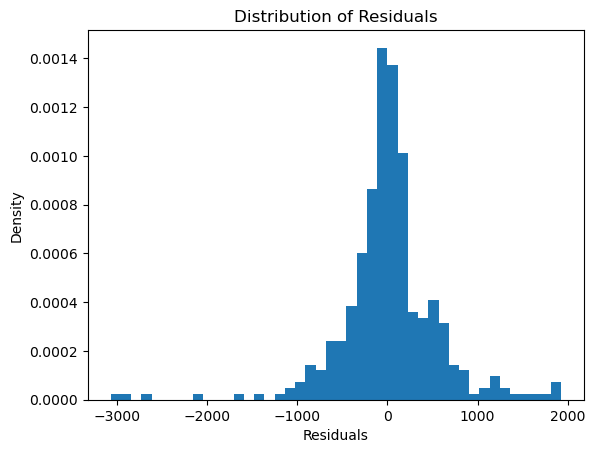

In [74]:
# Plot a histogram of the residuals
plt.hist(residuals_df['residuals'], bins='auto', density=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()

Looks like the residuals are normally distributed, which is a good sign. Let's confirm this with a Shapiro-Wilk test.

In [75]:
def kolmogorov_test(data):
    # Standardize the residuals
    standardized_residuals = (residuals_df['residuals'] - residuals_df['residuals'].mean()) / residuals_df['residuals'].std()
    # Perform the Kolmogorov-Smirnov test
    stat, p_value = kstest(standardized_residuals, 'norm')

    alpha = 0.05
    print(p_value)
    if p_value > alpha:
        print("The residuals follow a normal distribution (fail to reject null hypothesis)")
    else:
        print("The residuals do not follow a normal distribution (reject null hypothesis)")
        
kolmogorov_test(residuals_df['residuals'])

7.026747959411259e-05
The residuals do not follow a normal distribution (reject null hypothesis)


The test shows that hypothesis about normal distribution is declined. This may be due to the anomalies which can be found in the data. Let's remove the anomalies and run the test again. 

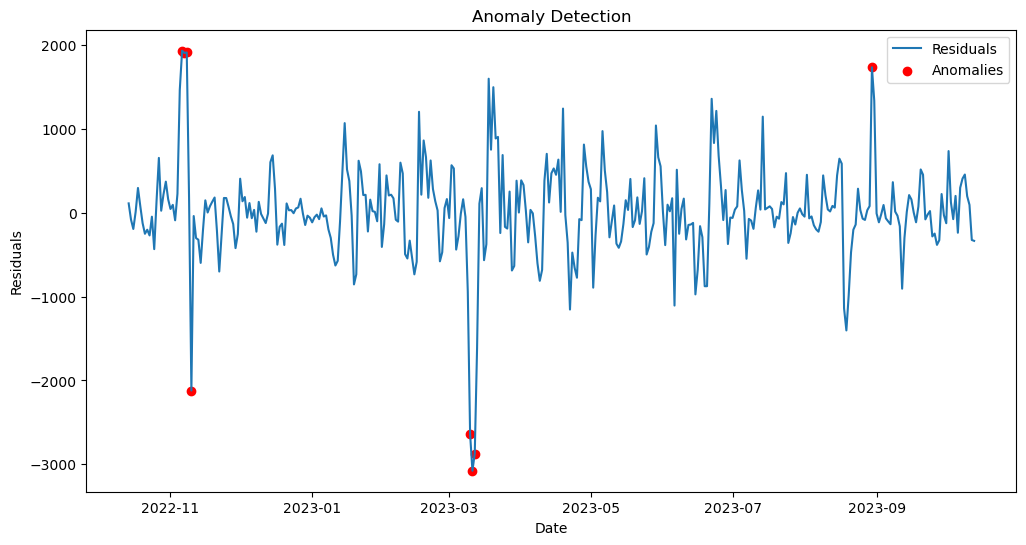

In [76]:
residuals_mean = residuals_df['residuals'].mean()
residuals_std = residuals_df['residuals'].std()

# Set the threshold of standard deviations for anomaly detection
threshold = 3
mask = (residuals_df['residuals'] > residuals_mean + threshold * residuals_std) | (
    residuals_df['residuals'] < residuals_mean - threshold * residuals_std)
anomalies = residuals_df[mask]

# Visualize the anomaly detection
plt.figure(figsize=(12, 6))
plt.plot(residuals_df.index, residuals_df['residuals'], label='Residuals')
plt.scatter(anomalies.index,
            anomalies['residuals'], color='red', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Anomaly Detection')
plt.legend()
plt.show()

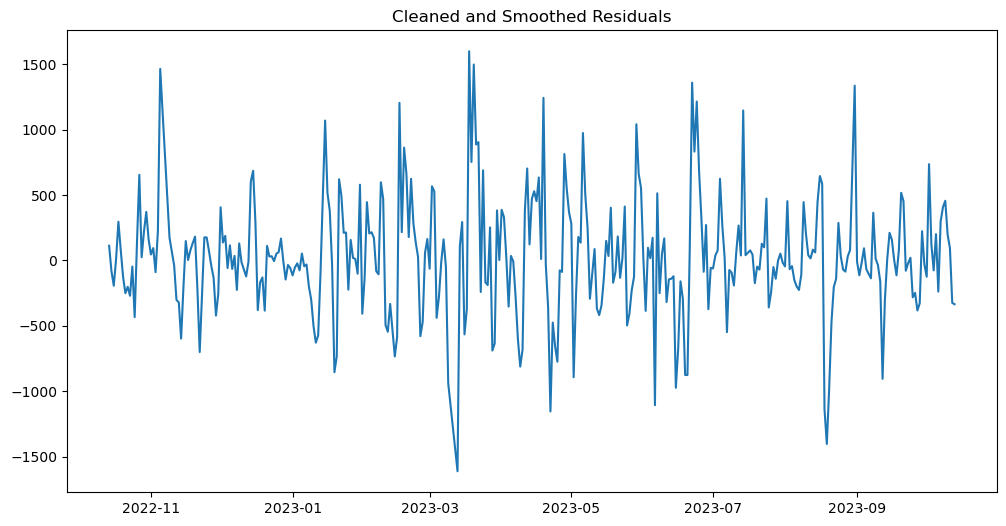

In [77]:
# Plot the cleaned and smoothed residuals
residuals_df_clean = residuals_df[~mask]
residuals_df_smoothed = residuals_df_clean.interpolate(method='linear')
plt.figure(figsize=(12, 6))
plt.plot(residuals_df_smoothed.index, residuals_df_smoothed['residuals'])
plt.title('Cleaned and Smoothed Residuals')
plt.show()


Let's see how the test results change for the cleaned data.

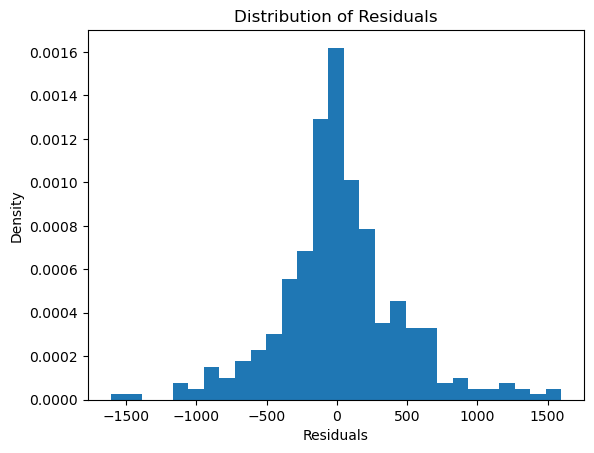

7.026747959411259e-05
The residuals do not follow a normal distribution (reject null hypothesis)


In [78]:
plt.hist(residuals_df_clean['residuals'], bins='auto', density=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()

kolmogorov_test(residuals_df_clean['residuals'])

As observable from the results of the test, situation hardly changed. We need to use t-distribution to accurately model our data.

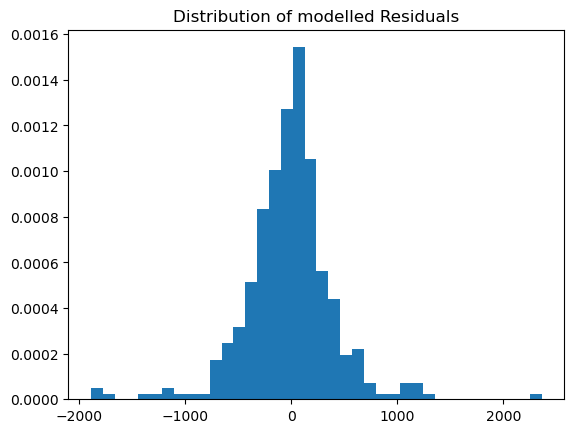

In [79]:
# Fit a t-distribution to the residuals
df, loc, scale = t.fit(residuals_df_clean['residuals'])

# Generate random numbers from the fitted t-distribution
generated_residuals = t.rvs(df, loc, scale, size=len(residuals_df))
residuals_model = pd.DataFrame({'residuals': generated_residuals},
                            index=bitcoin_df.index)

# plt.hist(residuals_model['residuals'], bins='auto', density=True)
plt.hist(residuals_model['residuals'], bins='auto', density=True)
plt.title('Distribution of modelled Residuals')
plt.show()

The t-distribution is much more spread out then our original data. Let's use a function that will truncate given distribution to generate data on the range we need.

In [80]:
def truncated_t_rvs(df, loc, scale, lower_bound, upper_bound, size):
    # Generate a large number of values from the t-distribution
    values = t.rvs(df, loc, scale, size=10*size)

    # Filter the values to only include those within the desired range
    values = values[(values >= lower_bound) & (values <= upper_bound)]

    # If not enough values were generated, repeat the process
    while len(values) < size:
        extra_values = t.rvs(df, loc, scale, size=10*size)
        extra_values = extra_values[(extra_values >= lower_bound) & (extra_values <= upper_bound)]
        values = np.concatenate([values, extra_values])

    # Return the desired number of values
    return values[:size]


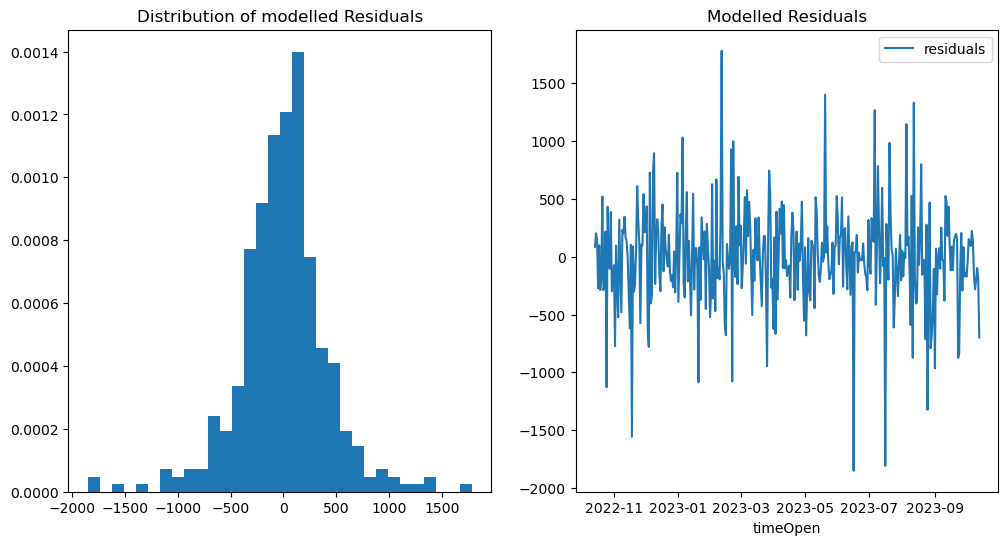

In [81]:
# deternining the spread of original residuals distribution
min_residual = residuals_df['residuals'].min()
max_residual = residuals_df['residuals'].max()

# Use the function to generate values from a truncated t-distribution
generated_residuals = truncated_t_rvs(df, loc, scale, min_residual, max_residual, len(residuals_df))

residuals_model = pd.DataFrame({'residuals': generated_residuals}, index=bitcoin_df.index)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].hist(residuals_model['residuals'], bins='auto', density=True)
axes[0].set_title('Distribution of modelled Residuals')
residuals_model.plot(title='Modelled Residuals', ax=axes[1])
plt.show()

Final step is to combine our trend and residual series into one model which simulates our data.

<Axes: title={'center': 'Original Data'}, xlabel='timeOpen'>

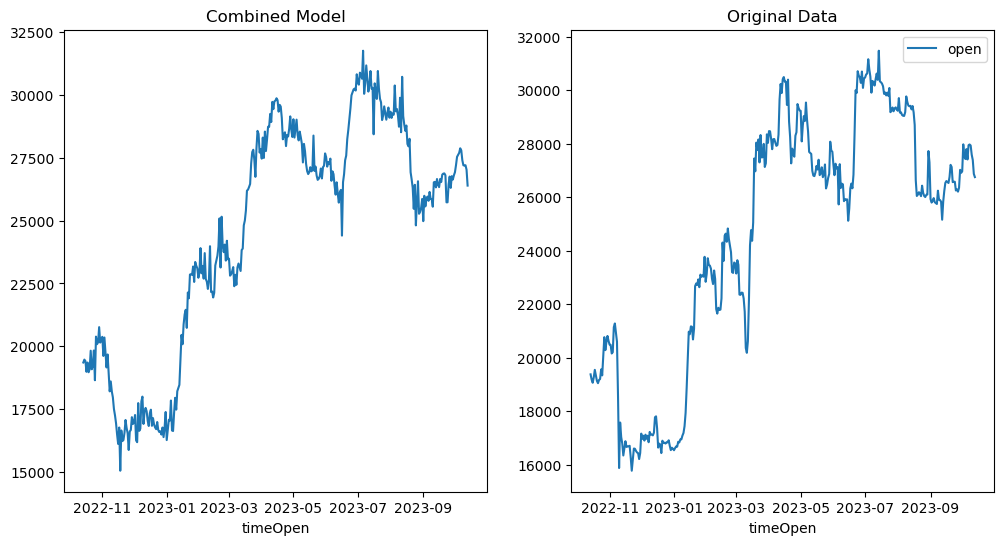

In [82]:
combined_model = trend_model[:, 1] + residuals_model['residuals']
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
combined_model.plot(ax=axes[0], title='Combined Model')
bitcoin_df.plot(ax=axes[1], title='Original Data')
